<a href="https://colab.research.google.com/github/Ankush-patil/PythonSudies/blob/master/MLproject2Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankushbpatil","key":"716df9ec883f7d408a6a1329e8c8265e"}'}

In [5]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jul 19 16:30 kaggle.json


In [6]:
!pip install -q kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!pwd

/content


In [12]:
!kaggle datasets list 

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           6285        209  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2006         90  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          16688        484  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

In [14]:
!kaggle datasets download -d rmisra/clothing-fit-dataset-for-size-recommendation

 83% 33.0M/39.7M [00:00<00:00, 63.7MB/s]
100% 39.7M/39.7M [00:00<00:00, 62.8MB/s]


In [16]:
!ls


clothing-fit-dataset-for-size-recommendation.zip  kaggle.json
gdrive						  sample_data


In [18]:
!unzip clothing-fit-dataset-for-size-recommendation.zip

Archive:  clothing-fit-dataset-for-size-recommendation.zip
  inflating: modcloth_final_data.json  
  inflating: renttherunway_final_data.json  


In [19]:
!ls


clothing-fit-dataset-for-size-recommendation.zip  modcloth_final_data.json
gdrive						  renttherunway_final_data.json
kaggle.json					  sample_data


In [20]:
import numpy as np
import pandas as pd


In [41]:
#df =  pd.read_json("modcloth_final_data.json",lines = True)
df2 = pd.read_json("renttherunway_final_data.json",lines = True,convert_dates=True)

In [42]:
df2.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [43]:
df2.shape

(192544, 15)

In [45]:
df2.sample(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
159345,fit,838784,38c,178527,NaN,10.0,party,"I loved this dress. I am 5'9"" and the length ...",hourglass,Comfortable & Flattering,dress,"5' 9""",24,30.0,"June 3, 2015"
176704,small,902780,34d,367523,155lbs,8.0,work,The dress fit perfectly except in the waist- t...,hourglass,Beautiful but No Stretch,dress,"5' 3""",12,27.0,"March 23, 2017"


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [65]:
df2.drop(columns='review_date',inplace=True)

In [66]:
duplicateData = df2[df2.duplicated()]
duplicateData.sort_values(by = 'item_id' )

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
159400,fit,300403,36d,123793,NaN,10.0,formal affair,Low back. Curve hugging,hourglass,Love it great material,gown,"5' 2""",20,35.0
84364,fit,148459,38d,126335,180lbs,8.0,formal affair,I chose this dress for a black tie event and i...,pear,Stunning,dress,"5' 0""",28,39.0
179204,fit,805713,34b,131533,110lbs,10.0,wedding,Wore this to a black tie optional wedding and ...,straight & narrow,Perfect wedding gown!,gown,"5' 6""",1,29.0
72197,large,541428,NaN,139086,NaN,NaN,formal affair,"I rented this for a formal event, but it was t...",hourglass,Gorgeous but too big,gown,"5' 4""",12,39.0
115669,large,19507,34b,141761,NaN,10.0,wedding,The color is stunning and the fit is classy an...,athletic,Beautiful dress for a beautiful wedding!,dress,"5' 4""",4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151212,fit,319591,NaN,1980086,NaN,10.0,formal affair,This is a gorgeous dress. It is very form fit...,hourglass,This dress was absolutely stunning.,gown,"5' 6""",24,53.0
159009,fit,12161,34b,2231364,115lbs,10.0,party,Wore this to a mother's day brunch and the col...,straight & narrow,Mother's Day,romper,"5' 6""",4,38.0
179588,fit,248335,34d,2743152,148lbs,10.0,everyday,This is really flattering on. I will say it cu...,apple,Loved it,jumpsuit,"5' 5""",16,47.0
171781,fit,408192,34c,2760153,132lbs,8.0,vacation,I received so many compliments on this shirt. ...,NaN,Perfect for my vacation to Charleston. I wore ...,top,"5' 5""",8,27.0


In [76]:
df2[df2['user_id'] == 148459]

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
14780,fit,148459,38d,126335,180lbs,8.0,formal affair,I chose this dress for a black tie event and i...,pear,Stunning,dress,"5' 0""",28,39.0
84364,fit,148459,38d,126335,180lbs,8.0,formal affair,I chose this dress for a black tie event and i...,pear,Stunning,dress,"5' 0""",28,39.0
166331,fit,148459,38d,139086,180lbs,10.0,formal affair,This dress is stunning and I received a TON of...,pear,Stunning!,gown,"5' 0""",35,39.0


In [79]:
df2.drop_duplicates(inplace=True)

In [81]:
df2.shape

(192329, 14)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192329 entries, 0 to 192543
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192329 non-null  object 
 1   user_id         192329 non-null  int64  
 2   bust size       173941 non-null  object 
 3   item_id         192329 non-null  int64  
 4   weight          162382 non-null  object 
 5   rating          192248 non-null  float64
 6   rented for      192319 non-null  object 
 7   review_text     192329 non-null  object 
 8   body type       177708 non-null  object 
 9   review_summary  192329 non-null  object 
 10  category        192329 non-null  object 
 11  height          191654 non-null  object 
 12  size            192329 non-null  int64  
 13  age             191369 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 22.0+ MB


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

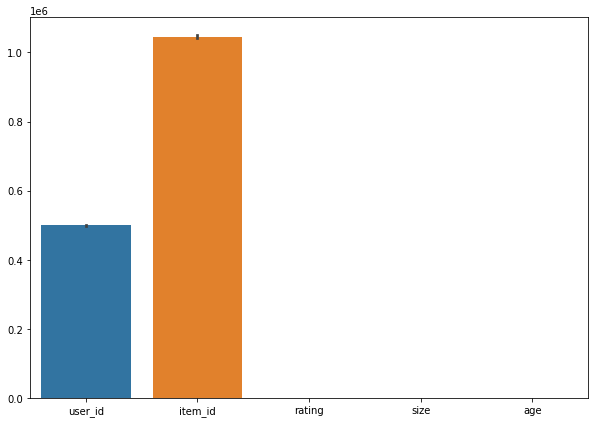

In [93]:
plt.figure(figsize=(10,7))
sns.barplot(data=df2)